In [1]:
#импорт основных библиотек

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#импорт датасета

from google.colab import files 
uploaded = files.upload()

Saving КР2.xlsx to КР2 (1).xlsx


In [176]:
#начальный вид датасета. сразу же кодируем успешный/не успешный магазин значениями 0 и 1 соответственно - это наша задача классификации

df = pd.read_excel('КР2.xlsx', sheet_name='Вар (1)')
df

,Площадь загальна кв.м,Этаж,Количество сотрудников в магазине,Тип,Кількість відгуків в гуглі,Количество чеков,Среднее количество единиц в чеке,Населення,"Середній дохід наелення,грн",Магазин мобільного звязку,Продуктовий ринок,Речовий ринок,Транзитна зупинка міжміського ГТ,Зупинка ГТ,Успех
0,9.00,1,1,Соціальний,NaN,571.0,1.56,108.0,13884.0,0,0,0,0,1,0
1,30.00,1,1,Соціальний,8.0,1197.0,2.03,750.0,11700.0,0,0,0,1,1,0
2,15.00,1,1,Соціальний,NaN,402.0,1.81,0.0,6786.0,0,0,0,1,1,0
3,20.00,1,1,Стандартний,NaN,1036.0,2.18,0.0,12948.0,0,0,0,1,1,0
4,30.00,1,1,Соціальний,NaN,513.0,1.63,0.0,11427.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,51.77,1,3,Преміальний,4.0,6669.0,1.89,963.0,9399.0,0,0,0,0,0,1
65,27.26,1,2,Преміальний,3.0,2877.0,1.85,0.0,14079.0,0,1,1,0,0,1
66,148.91,1,1,Стандартний,12.0,2146.0,1.99,315.0,11427.0,0,0,0,0,0,0
67,50.93,1,2,Соціальний,17.0,413.0,1.73,0.0,13338.0,0,1,1,0,0,0


In [177]:
#проверка на нулевые значения. Видим, что особенно в этом плане выделяется количество отзывов

df.isna().sum()

Площадь загальна кв.м                  0
Этаж                                   0
Количество сотрудников в магазине      0
Тип                                    0
Кількість відгуків в гуглі            30
Количество чеков                       7
Среднее количество единиц в чеке       7
Населення                              5
Середній дохід наелення,грн            5
Магазин мобільного звязку              0
Продуктовий ринок                      0
Речовий ринок                          0
Транзитна зупинка міжміського ГТ       0
Зупинка ГТ                             0
Успех                                  0
dtype: int64

In [178]:
#заполним все пропуски, так как у нас достаточно мало данных

dfm = df

from sklearn.impute import SimpleImputer
#numeric
'''SimpleImputer - класс
imputer_mean - экземпляр
fit - метод класса'''

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['Кількість відгуків в гуглі']] = imputer_mean.fit_transform(dfm[['Кількість відгуків в гуглі']]).round()

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['Среднее количество единиц в чеке']] = imputer_mean.fit_transform(dfm[['Среднее количество единиц в чеке']]).round()

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['Населення']] = imputer_mean.fit_transform(dfm[['Населення']]).round()

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['Середній дохід наелення,грн']] = imputer_mean.fit_transform(dfm[['Середній дохід наелення,грн']]).round()

In [179]:
#подробная статистика всех переменных. Видим, что у нас есть и бинарные переменные в большом количестве. Далее рассмотрим каждый из параметров более подробно и выберем тот, который будем прогнозировать
#понимаем, что только успешность является интересным параметром для предсказания - например, параметр "магазин мобильной связи" не зависит от остальных факторов
df.describe()

,Площадь загальна кв.м,Этаж,Количество сотрудников в магазине,Кількість відгуків в гуглі,Количество чеков,Среднее количество единиц в чеке,Населення,"Середній дохід наелення,грн",Магазин мобільного звязку,Продуктовий ринок,Речовий ринок,Транзитна зупинка міжміського ГТ,Зупинка ГТ,Успех
count,69.000000,69.0,69.000000,69.000000,62.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,47.412725,1.0,1.869565,42.898551,3018.112903,1.971014,295.956522,11306.855072,0.057971,0.173913,0.130435,0.101449,0.362319,0.362319
std,37.862989,0.0,0.838645,61.280489,2009.425047,0.240772,310.467836,2347.336283,0.235401,0.381812,0.339248,0.304135,0.484192,0.484192
min,4.000000,1.0,1.000000,1.000000,369.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.720000,1.0,1.000000,12.000000,1475.250000,2.000000,0.000000,10296.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.300000,1.0,2.000000,43.000000,2467.000000,2.000000,253.000000,11427.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.240000,1.0,2.000000,43.000000,4103.250000,2.000000,545.000000,12948.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,232.300000,1.0,4.000000,367.000000,7852.000000,3.000000,963.000000,14937.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [180]:
#для удобства работы необходимо переименовать все колонки, в том числе, чтобы построить графики распределения

df.rename(columns={'Площадь загальна кв.м': 'square'}, inplace=True)
df.rename(columns={'Этаж': 'floor'}, inplace=True)
df.rename(columns={'Количество чеков': 'receipt'}, inplace=True)
df.rename(columns={'Кількість відгуків в гуглі': 'Google_marks'}, inplace=True)
df.rename(columns={'Среднее количество единиц в чеке': 'midQ_receipt'}, inplace=True)
df.rename(columns={'Населення': 'People'}, inplace=True)
df.rename(columns={'Середній дохід наелення,грн': 'mid_income'}, inplace=True)
df.rename(columns={'Магазин мобільного звязку': 'mobile'}, inplace=True)
df.rename(columns={'Продуктовий ринок': 'food_market'}, inplace=True)
df.rename(columns={'Речовий ринок': 'product_market'}, inplace=True)
df.rename(columns={'Транзитна зупинка міжміського ГТ': 'int_stop'}, inplace=True)
df.rename(columns={'Зупинка ГТ': 'city_stop'}, inplace=True)
df.rename(columns={'Тип': 'type'}, inplace=True)
df.rename(columns={'Количество сотрудников в магазине	': 'ds'}, inplace=True)
df.rename(columns={'Успех': 'success'}, inplace=True)

In [181]:
#проверка типов данных. Один из параметров - текстовый и категориальный, что будет важно в дальнейшем

df.dtypes

square                                float64
floor                                   int64
Количество сотрудников в магазине       int64
type                                   object
Google_marks                          float64
receipt                               float64
midQ_receipt                          float64
People                                float64
mid_income                            float64
mobile                                  int64
food_market                             int64
product_market                          int64
int_stop                                int64
city_stop                               int64
success                                 int64
dtype: object

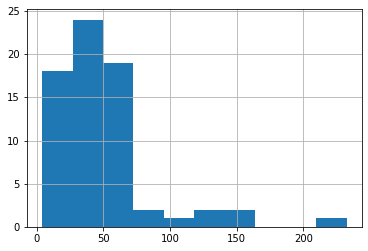

In [182]:
#распределение площади. По нему видно, что есть небольшой крупный отдельный выброс, который мы удалим без использования дополнительных иструментов

df.square.hist()
df = df.loc[df['square'] < 180]

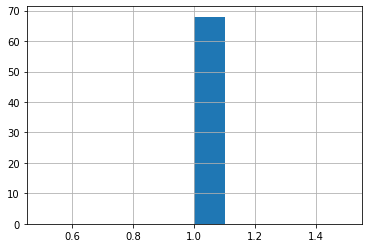

In [183]:
#переменная, у которой только 1 значение. Очевидно, что не несет никакого смысла
df.floor.hist()

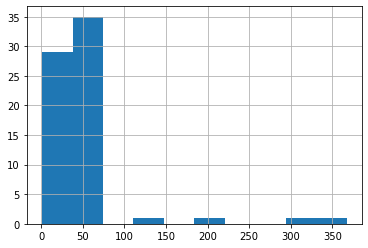

In [184]:
#несмотря на наличие выбросов, тут они носят логичный характер и, после заполнения пропущенных участков выглядят адекватно. Тем не менее, на мой взгляд, количество отзывов не повлияют на переменную, которую хотелось бы изучить

df.Google_marks.hist()

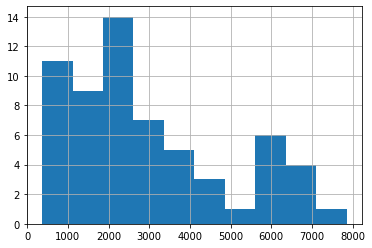

In [185]:
#переменная, которую мы уже объясняли и которая может сильно влиять на понятие успешности. Нормальное распределение, поэтому конечно берем в модель

df.receipt.hist()

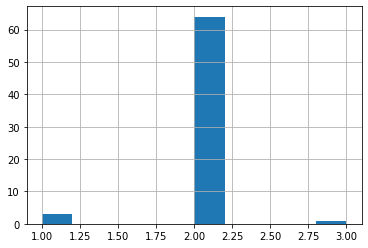

In [186]:
#бесполезная переменная с парой выбросов. Будет удалена

df.midQ_receipt.hist()

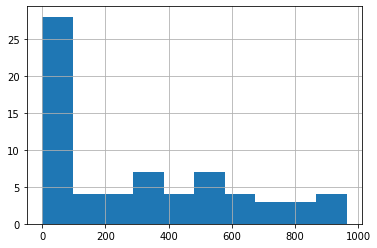

In [187]:
#Население - ок переменная для анализа с адекватным распределением. Возможно, можно было бы ее логарифмировать, но этого делать не будем

df.People.hist()

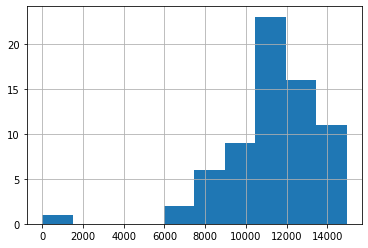

In [188]:
#средний доход. Одна из ключевых переменных. Удаляем выброс с аномально низким значением и двигаемся дальше.
df.mid_income.hist()
df = df.loc[df['mid_income'] > 5000]

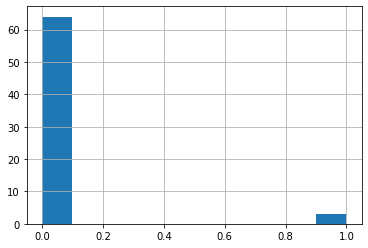

In [189]:
#бинарная переменная без особого интереса - слишком малое кол-во этих мобильных точек. Будет удалена

df.mobile.hist()

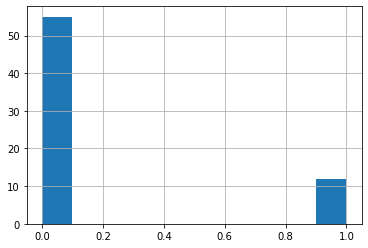

In [190]:
#бинарная переменная. Оставим для исследования.

df.food_market.hist()

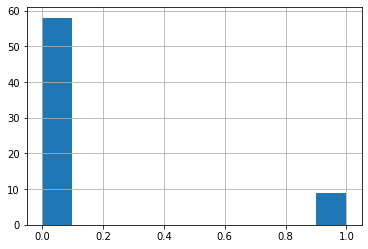

In [191]:
#бинарная переменная. Оставим для исследования.

df.product_market.hist()

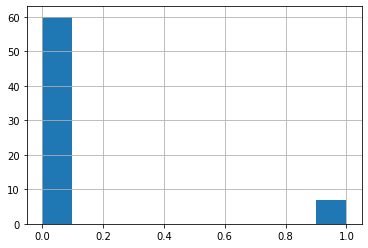

In [192]:
#бинарная переменная. Все же принял ее оставить, возможно, она достаточно влияет на формирование цены
df.int_stop.hist()

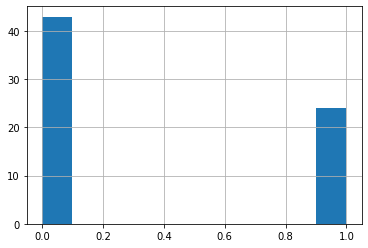

In [193]:
#хорошая бинарная переменная

df.city_stop.hist()

In [194]:
#бинарное кодирование категориальной переменной с типом магазина. Тип точно влияет на чек, и мы должны создать отдельные переменные

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False) # sparse=False categorical_features=...
new_ohe_features = ohe.fit_transform(df.type.values.reshape(-1, 1))
tmp = pd.DataFrame(new_ohe_features, columns=['type' + str(i) for i in range(new_ohe_features.shape[1])])
df = pd.concat([df, tmp], axis=1)
df

,square,floor,Количество сотрудников в магазине,type,Google_marks,receipt,midQ_receipt,People,mid_income,mobile,food_market,product_market,int_stop,city_stop,success,type0,type1,type2,type3,type4
0,9.00,1.0,1.0,Соціальний,43.0,571.0,2.0,108.0,13884.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,30.00,1.0,1.0,Соціальний,8.0,1197.0,2.0,750.0,11700.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,15.00,1.0,1.0,Соціальний,43.0,402.0,2.0,0.0,6786.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,20.00,1.0,1.0,Стандартний,43.0,1036.0,2.0,0.0,12948.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,30.00,1.0,1.0,Соціальний,43.0,513.0,2.0,0.0,11427.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,51.77,1.0,3.0,Преміальний,4.0,6669.0,2.0,963.0,9399.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
65,27.26,1.0,2.0,Преміальний,3.0,2877.0,2.0,0.0,14079.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
66,148.91,1.0,1.0,Стандартний,12.0,2146.0,2.0,315.0,11427.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
67,50.93,1.0,2.0,Соціальний,17.0,413.0,2.0,0.0,13338.0,0.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


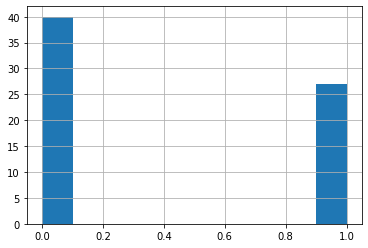

In [195]:
#бинарная переменная. Оставим для исследования.

df.type0.hist()

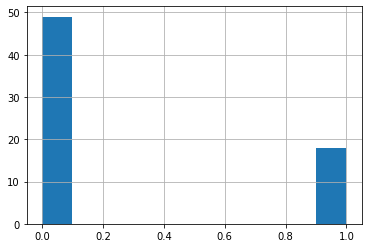

In [196]:
#бинарная переменная. Оставим для исследования.

df.type1.hist()

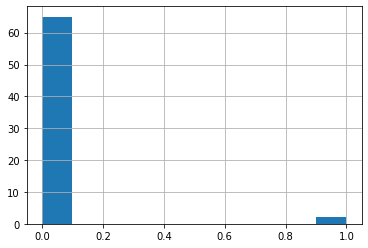

In [197]:
#бинарная переменная. Слишком редкая и может создать перекос в модели, удаляем

df.type2.hist()

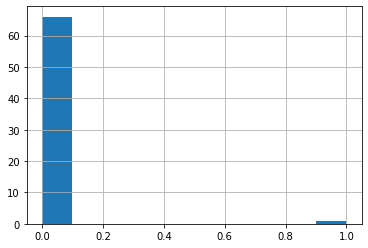

In [198]:
#бинарная переменная. Слишком редкая и может создать перекос в модели, удаляем. Добавлять им замену не будем, пусть эти типы будут пропущены

df.type3.hist()

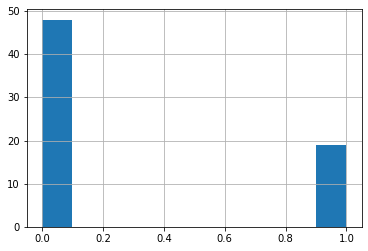

In [199]:
#бинарная переменная. Оставим для исследования.

df.type4.hist()

In [200]:
#Удаляем лишние колонки и заполняем 0 пропущенные в категориальных переменных значения(так как оставшиеся 3 магазина не относятся ни к одному из типов)
df = df.drop(columns = ['midQ_receipt'], );
df = df.drop(columns = ['mobile'], );
df = df.drop(columns = ['floor'], );
df = df.drop(columns = ['type2'], );
df = df.drop(columns = ['type3'], );
df = df.drop(columns = ['Google_marks'], );
df = df.drop(columns = ['type'], );
df = df.fillna(0) 

In [201]:
#попробуем решить задачу кластеризации с использованием метода К-средних

In [202]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
pd.DataFrame(df, columns = ['square','Количество сотрудников в магазине ','receipt','People','mid_income','food_market','product_market','int_stop','city_stop','type0','type1','type4','success']).round()

,square,Количество сотрудников в магазине,receipt,People,mid_income,food_market,product_market,int_stop,city_stop,type0,type1,type4,success
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
65,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
66,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
67,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


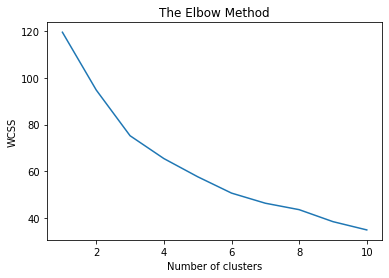

In [203]:
# Using the elbow method to find the optimal number of clusters. Вилим наибольший слом в 3 или 4. Проверим и через метод силуєта
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

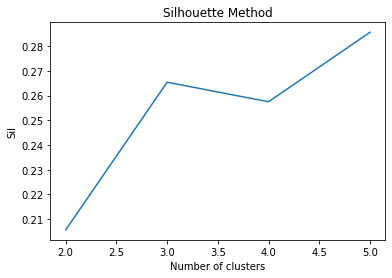

2:0.20564088814648618
3:0.26543168782273097
4:0.2575348022104739
5:0.28567245947618786


In [204]:
# Using the silhouette method to find the optimal number of clusters. Берем количество кластеров, равное 3
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 6):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

In [205]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 3, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['square','Количество сотрудников в магазине ','receipt','People','mid_income','food_market','product_market','int_stop','city_stop','type0','type1','type4','success']).round(2)

,square,Количество сотрудников в магазине,receipt,People,mid_income,food_market,product_market,int_stop,city_stop,type0,type1,type4,success
0,0.29,0.45,0.40,0.42,0.67,0.20,0.25,0.05,0.35,0.50,0.0,0.00,0.95
1,0.32,0.51,0.40,0.29,0.79,0.11,0.04,0.15,0.44,0.44,1.0,-0.00,-0.00
2,0.26,0.38,0.19,0.22,0.76,0.23,0.14,0.09,0.23,0.09,-0.0,0.82,-0.00


In [206]:
#предсказуемо что типы магазинов оказали влияние на распределение(кластер 2 и кластер 3, да и первый это по сути все остальные виды магазинов)
#однако, мы можем сравнить эти группы по показателям. Например, в магазине типа 1 работает больше сотрудников и самое большое среднее количество чеков. Кроме того, он чаще попадается на остановках транспорта
# магазины остальных типов чаще встречаются на продуктовых рынках и пользуются большим спросом - видимо, это связанно с торговлей товарами первой необходимости (хотя принципы формирования успешности мы не до конца определили)
# при этом они ниже по среднему доходу - очень может быть, что в эту категорию попали "элитные" магазины - они будут успешными при небольших продажах дорогих изделий - там большая наценка
# стоит отметить что остальные две группы неуспешные - это может быть выводом из того, что как раз у нас примерно 2/3 магазинов неуспешные
# по количеству рецептов ниже третий кластер - туда могли попасть магазины, которые торгуют какими-то большими товарами.

In [207]:
# Less features
X = df[:, [0, 1, 2]]

In [208]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 2, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['square','Количество сотрудников в магазине ','receipt']).round()

,square,Количество сотрудников в магазине,receipt
0,0.0,1.0,1.0
1,0.0,0.0,0.0


In [210]:
#уменьшение количества фич ничего не дало - две группы и связь "много людей - успех" и "мало людей - провал" это неинтересно на фоне полученных выше выводов. Попробуем построить SOM.

In [211]:
! pip install SimpSOM


In [212]:
import SimpSOM as sps
np.random.seed(605891282)
net = sps.somNet(20, 30, X, PBC=True)
net.train(0.01, 20000)
#net.save(‘filename_weights’)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


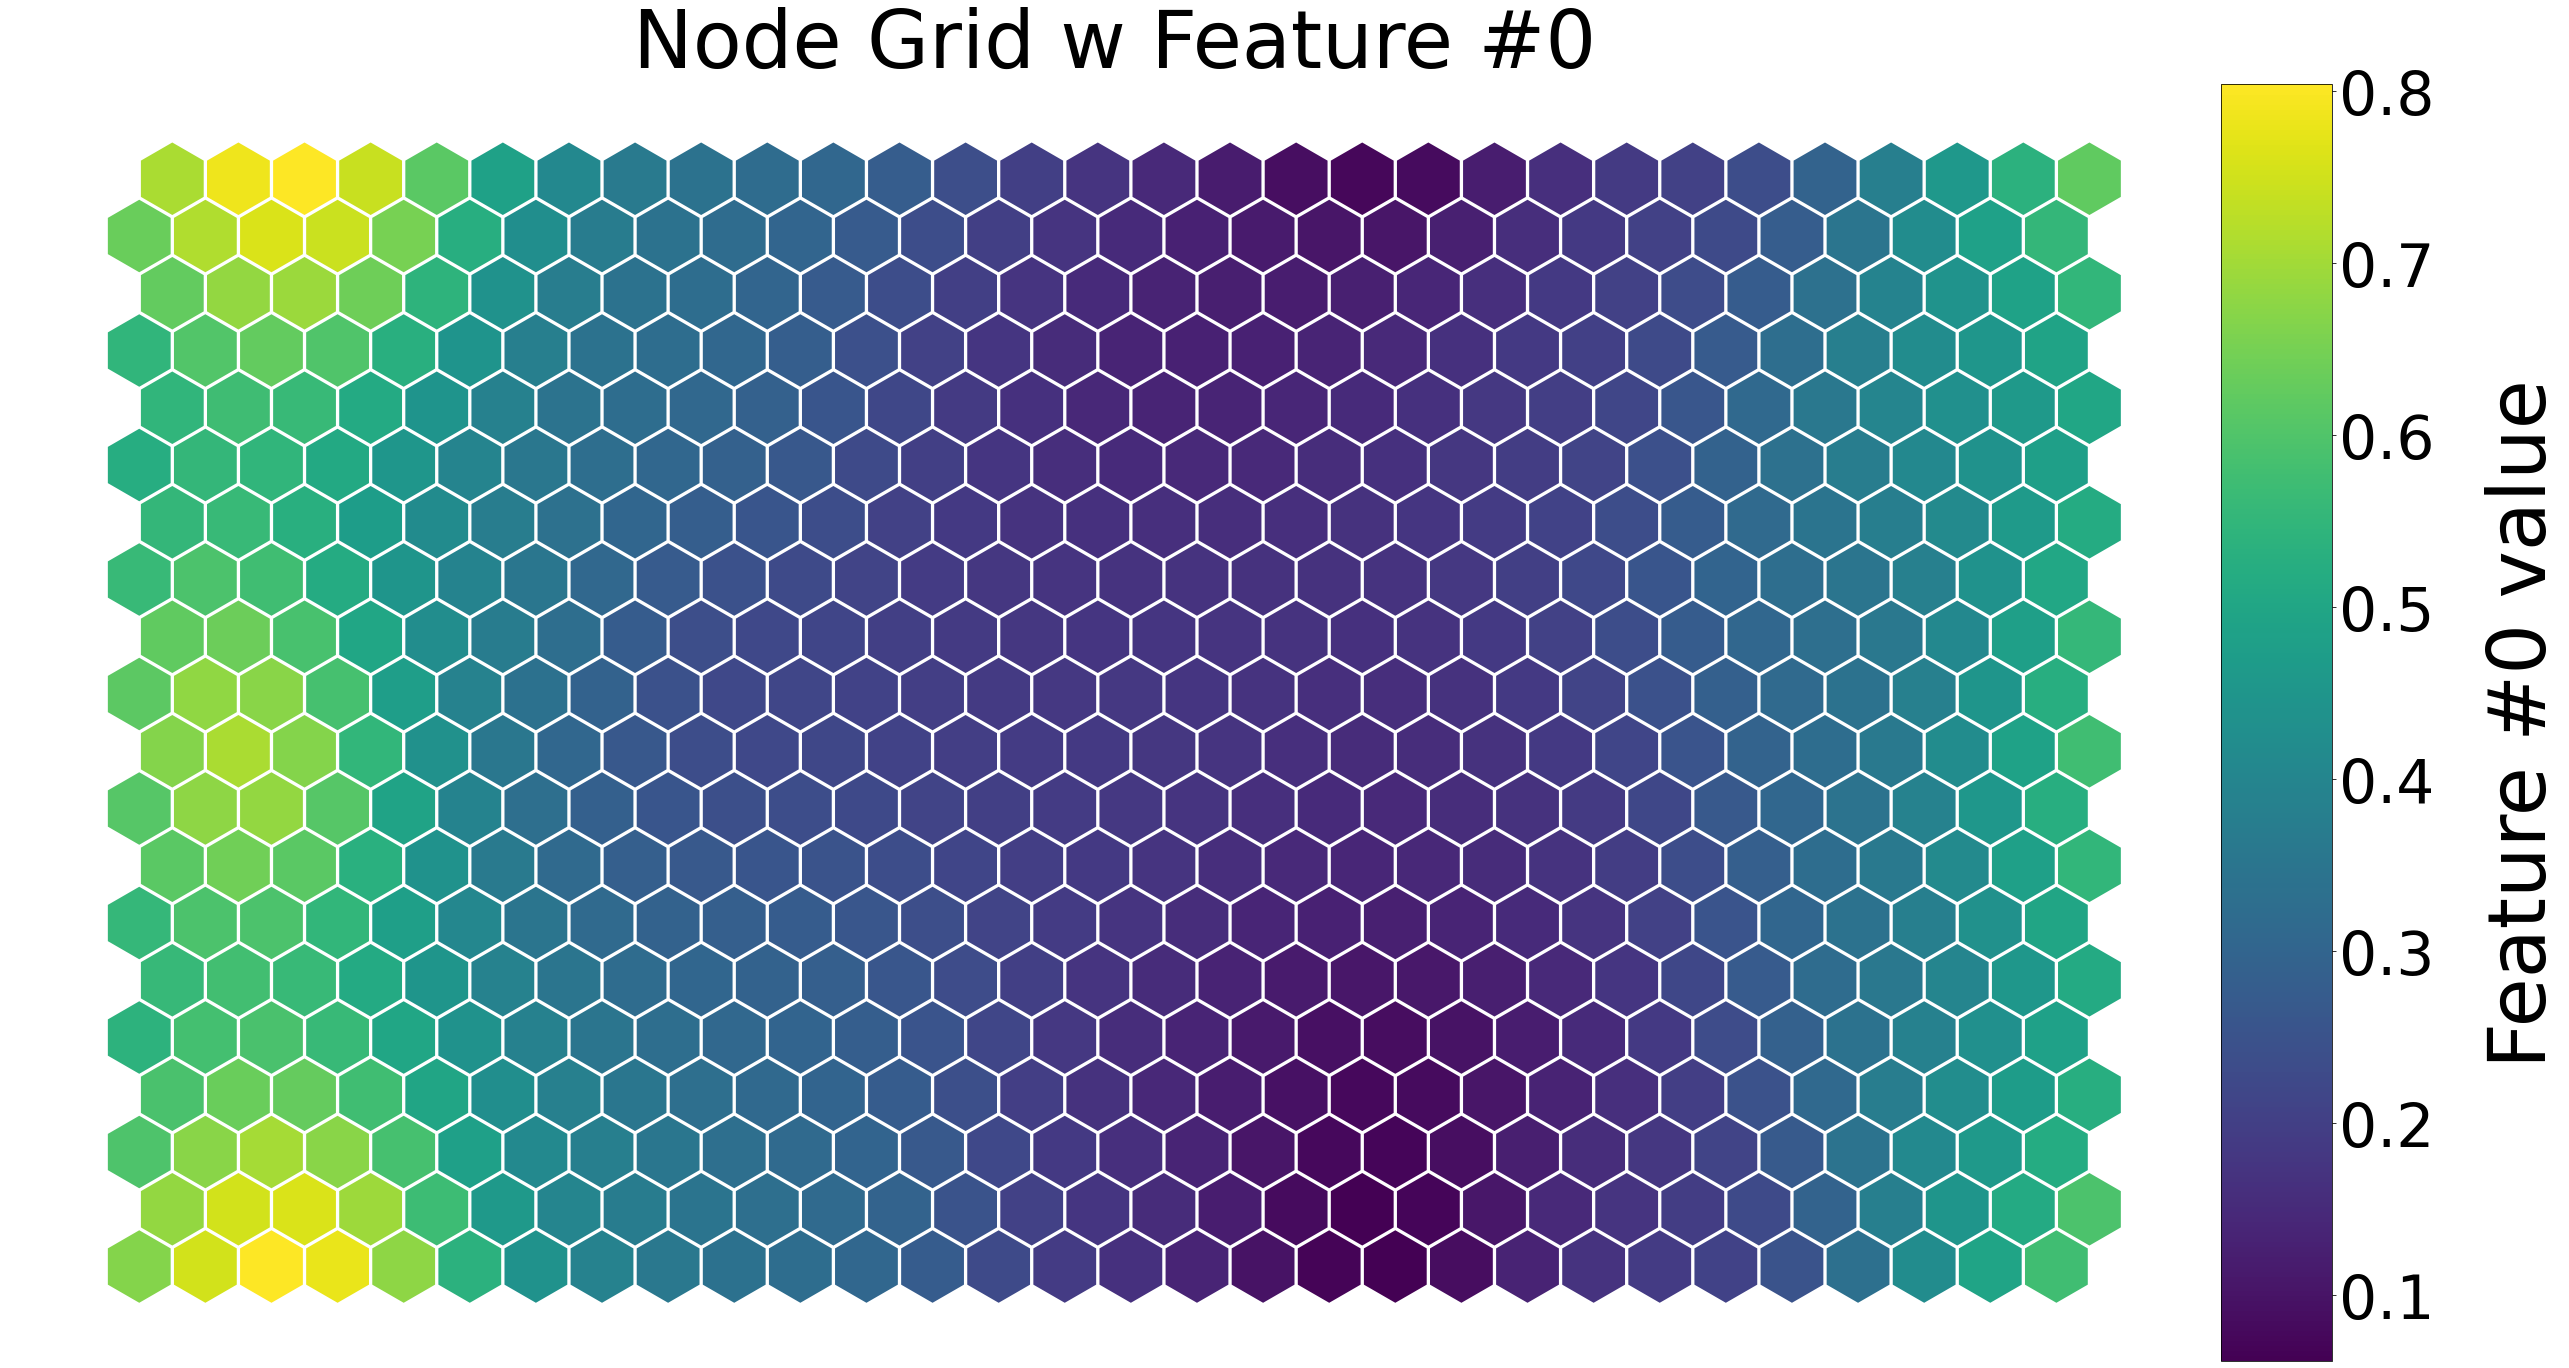

In [213]:
net.nodes_graph(colnum=0)

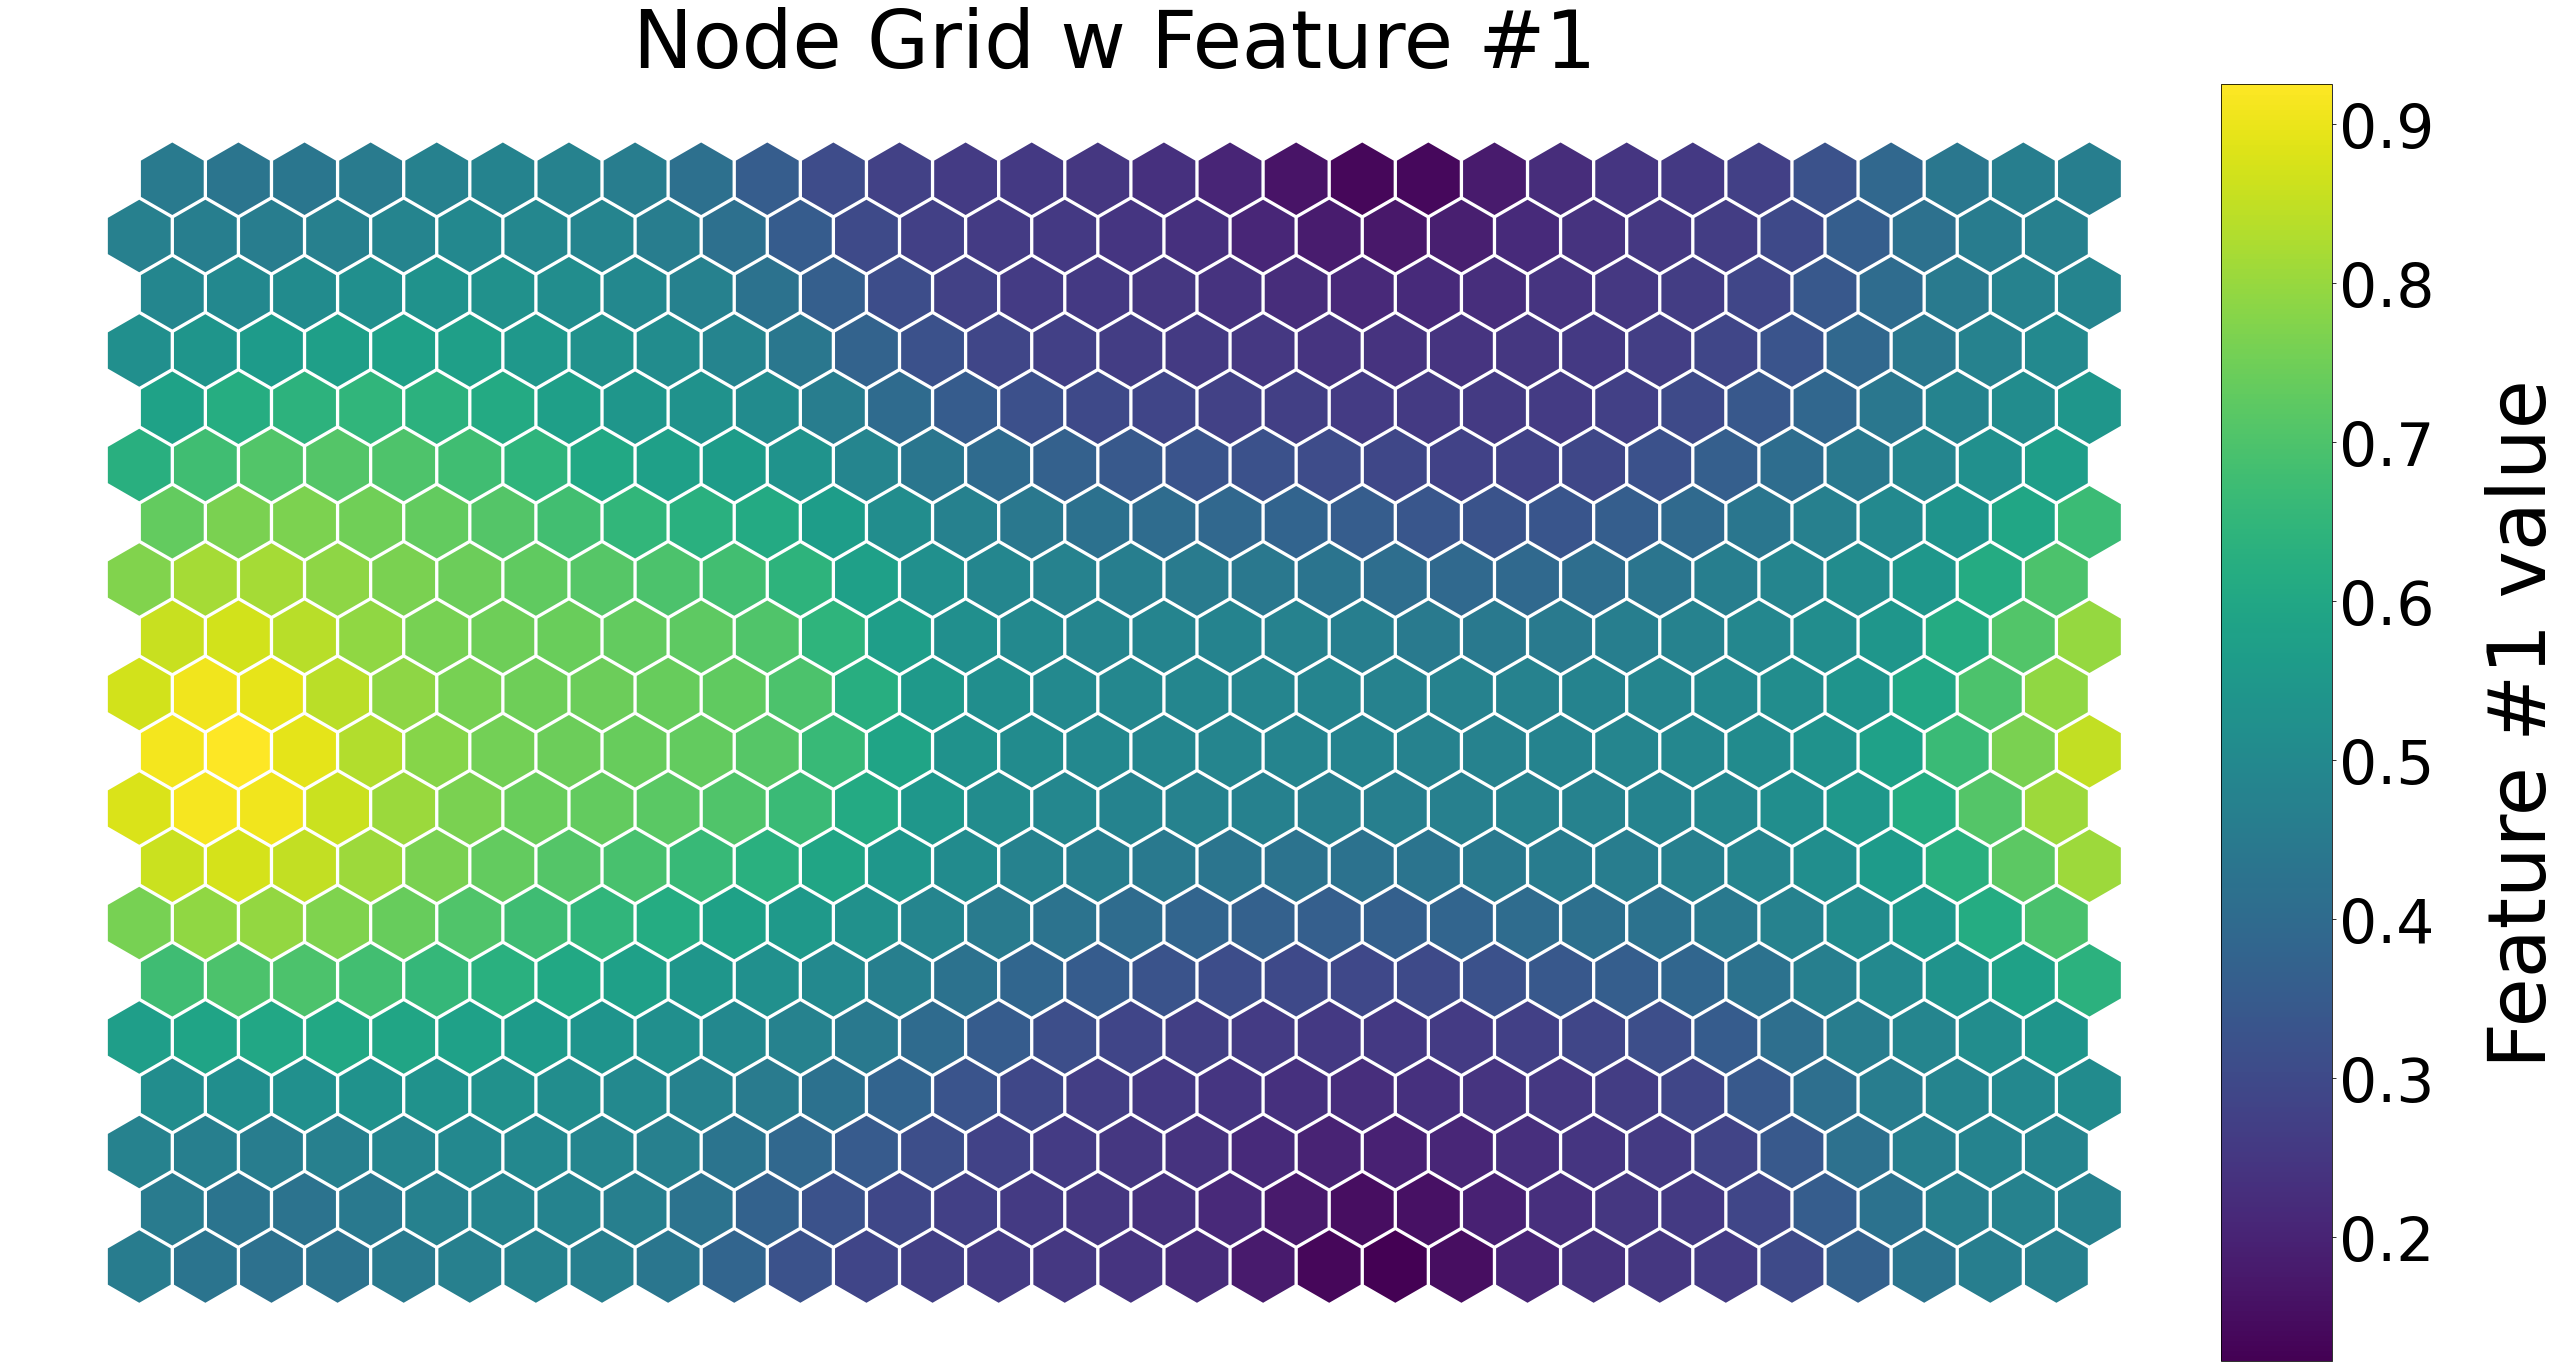

In [214]:
net.nodes_graph(colnum=1)

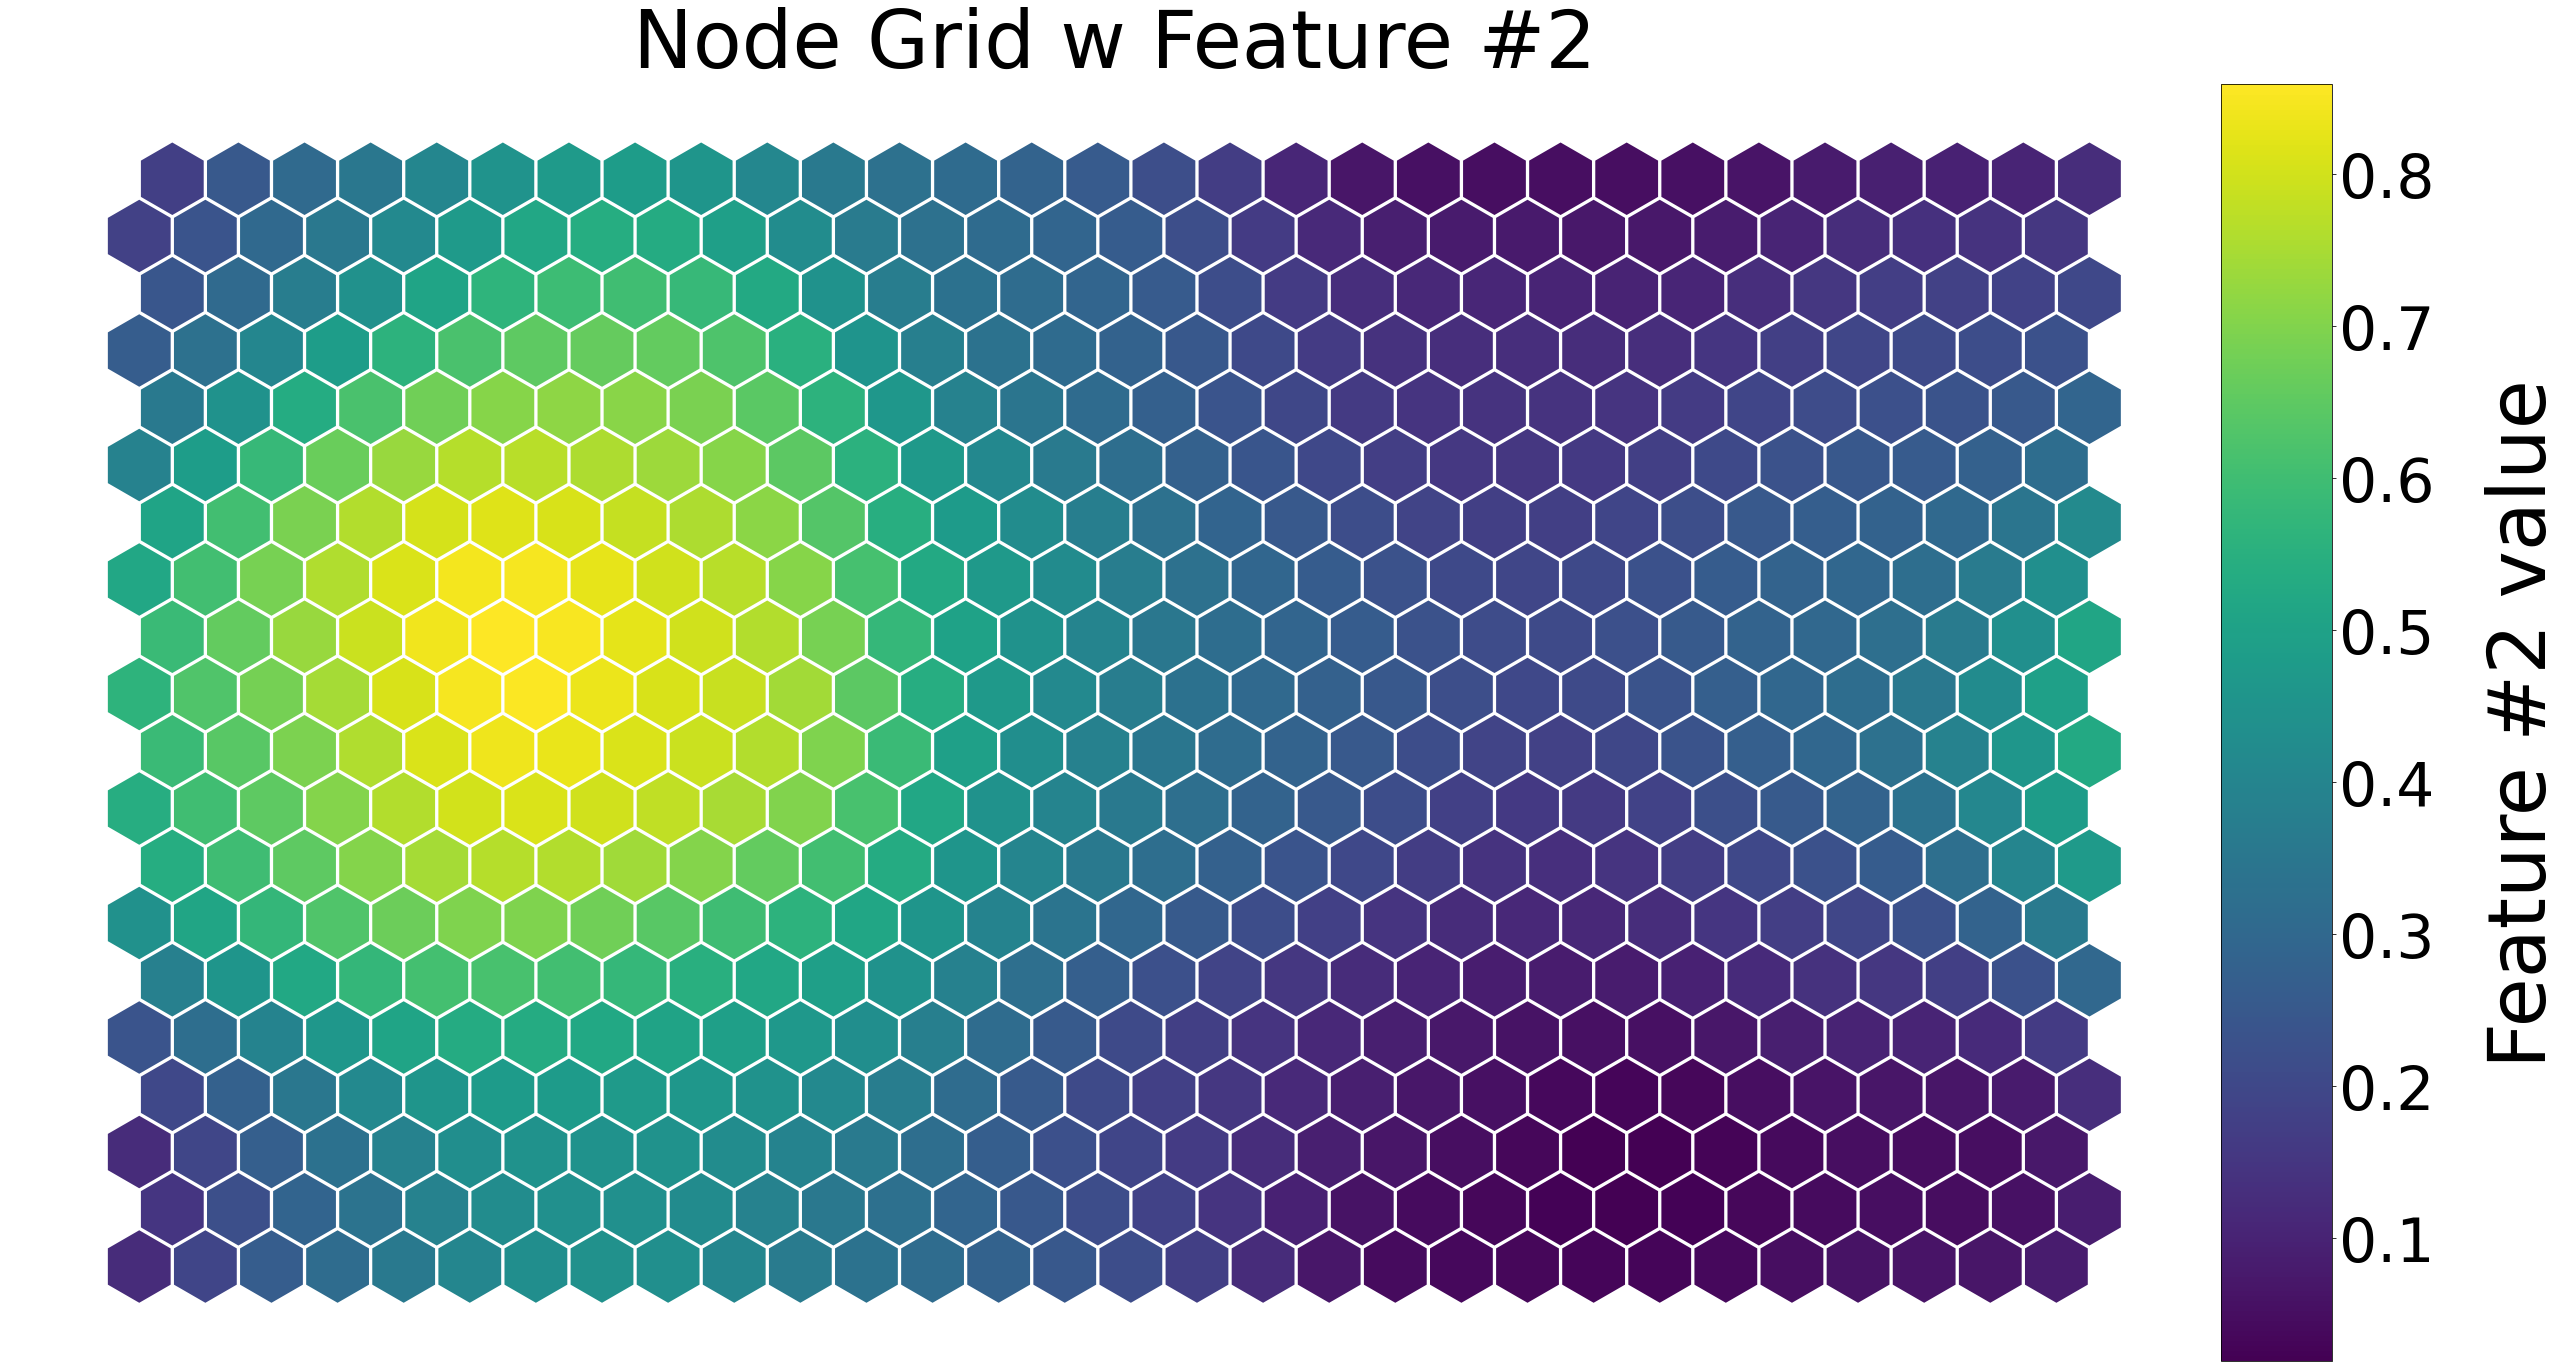

In [215]:
net.nodes_graph(colnum=2)

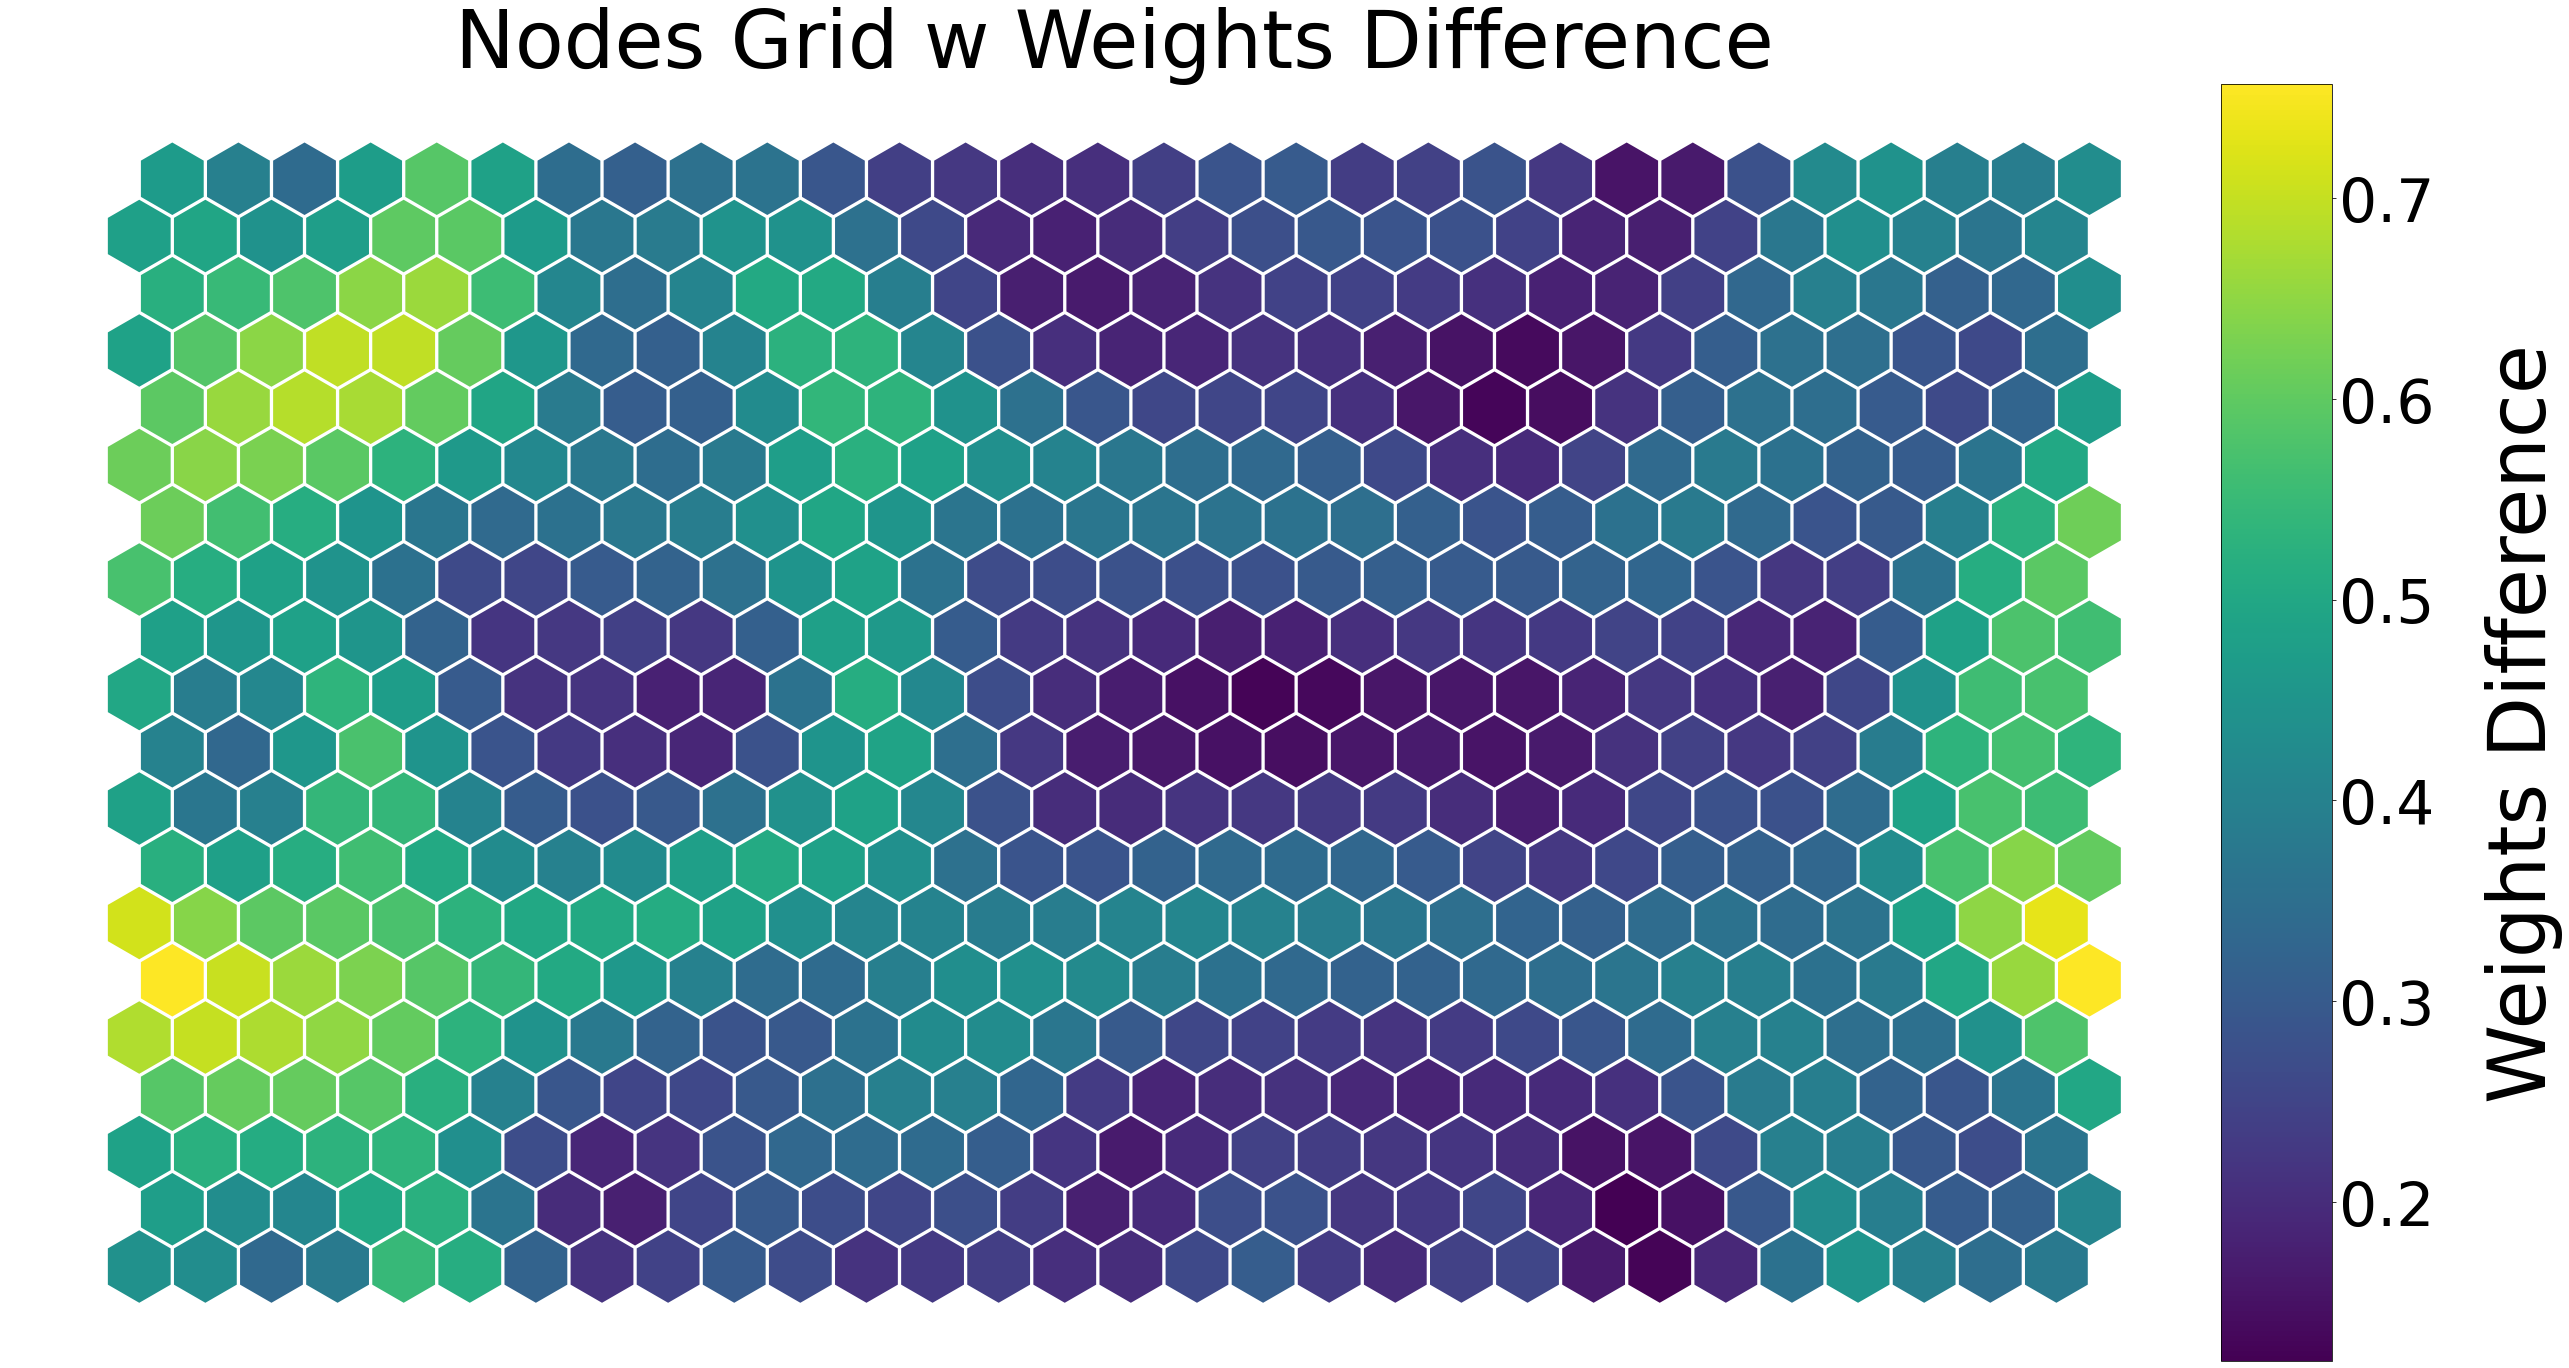

In [172]:
net.diff_graph()

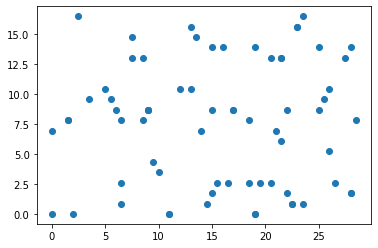

In [173]:
prj=np.array(net.project(X))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

In [174]:
# Fitting kmeans to SOM
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(prj)